In [1]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

지하철역 위치정보의 encoding 정보 찾기

In [2]:
import chardet
with open('location/서울시 역코드로 지하철역 위치 조회.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
print(result)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [4]:
os.chdir("D:\빅데이터\TEAM PROJECT\데이터 시각화\location")

dfs = [pd.read_csv(f,encoding="EUC-KR",index_col=[0], parse_dates=[0], engine='python') for f in os.listdir(os.getcwd()) if f.endswith('csv')]
# # pre_subway_location = pd.concat(dfs, axis=1, join='inner').sort_index()
pre_subway_location = pd.concat(dfs,ignore_index=True)

In [5]:
pre_subway_location

,전철역명,호선,외부코드,사이버스테이션,X좌표,Y좌표,X좌표(WGS),Y좌표(WGS)
0,가락시장,8,817,2818,525992.0,1108579.0,37.492522,127.118234
1,가락시장,3,350,2818,525992.0,1108579.0,37.492522,127.118234
2,종로3가,5,534,153,498060.0,1130332.0,37.571607,126.991806
3,종로3가,3,329,153,498060.0,1130332.0,37.571607,126.991806
4,종로3가,1,130,153,498060.0,1130332.0,37.571607,126.991806
5,오금,5,P552,2558,528137.0,1111147.0,37.502162,127.128111
6,오금,3,352,2558,528137.0,1111147.0,37.502162,127.128111
7,동대문,1,128,155,502155.0,1130180.0,37.571420,127.009745
8,동대문,4,421,155,502155.0,1130180.0,37.571420,127.009745
9,동대문역사문화공원,5,536,205,501555.0,1128600.0,37.565138,127.007896


In [6]:
len(pre_subway_location)

18580

In [7]:
subway_location=pre_subway_location[['X좌표(WGS)','Y좌표(WGS)']].groupby(pre_subway_location['전철역명']).mean()

In [8]:
subway_location

,X좌표(WGS),Y좌표(WGS)
전철역명,,
419민주묘지,NaN,NaN
가능,37.748577,127.044213
가락시장,37.492522,127.118234
가산디지털단지,37.481072,126.882343
가양,37.561391,126.854456
가오리,NaN,NaN
가재울,37.484192,126.683673
가정,37.524649,126.675539
가정중앙시장,37.517054,126.676672


In [10]:
data=pd.read_csv('D:/빅데이터/TEAM PROJECT/데이터 시각화/subway.csv',encoding="EUC-KR",engine='python')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43687 entries, 0 to 43686
Data columns (total 8 columns):
사용월       43687 non-null int64
호선명       43687 non-null object
지하철역      43687 non-null object
유임승차인원    43687 non-null int64
무임승차인원    43687 non-null int64
유임하차인원    43687 non-null int64
무임하차인원    43687 non-null int64
작업일자      43687 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.7+ MB


In [12]:
data['년도']=data["사용월"].astype(str).str[:4]
data['월']=data["사용월"].astype(str).str[4:6]

In [13]:
data.columns

Index(['사용월', '호선명', '지하철역', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원', '작업일자',
       '년도', '월'],
      dtype='object')

In [14]:
data1=data[['년도', '월','사용월','호선명', '지하철역', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원']]
data1

,년도,월,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원
0,2020,04,202004,9호선2~3단계,언주,184170,16729,185046,16460
1,2020,04,202004,2호선,합정,680012,48502,732794,48049
2,2020,04,202004,2호선,을지로3가,399344,51720,403589,50877
3,2020,04,202004,2호선,강변(동서울터미널),676082,83345,673317,81844
4,2020,04,202004,2호선,봉천,469912,105383,421275,106512
5,2020,04,202004,2호선,종합운동장,124211,21348,134927,22361
6,2020,04,202004,2호선,건대입구,800408,65268,872176,67494
7,2020,04,202004,2호선,홍대입구,1215864,68810,1316632,65931
8,2020,04,202004,2호선,당산,415631,44772,475721,48562
9,2020,04,202004,2호선,양천구청,117100,30390,121997,31013


In [15]:
data1["호선명"].unique()

array(['9호선2~3단계', '2호선', '3호선', '7호선', '4호선', '5호선', '6호선', '8호선', '9호선',
       '경춘선', '경강선', '경부선', '경원선', '경의선', '경인선', '공항철도 1호선', '과천선', '분당선',
       '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '1호선', '9호선2단계'],
      dtype=object)

In [16]:
# data1['호선명']=data1['호선명'].replace('9호선2~3단계','9호선')
# data1['호선명']=data1['호선명'].replace('9호선2단계','9호선')
data1.loc[data1['호선명'] == '9호선2~3단계','호선명'] = '9호선'
data1.loc[data1['호선명'] == '9호선2단계','호선명'] = '9호선'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
data1['전철역명']=data1['지하철역'].str.split('(').str[0]

In [18]:
data1.columns

Index(['년도', '월', '사용월', '호선명', '지하철역', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원',
       '전철역명'],
      dtype='object')

In [19]:
data2=data1[['년도', '월','사용월', '호선명', '전철역명', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원']]

In [20]:
data2

,년도,월,사용월,호선명,전철역명,유임승차인원,무임승차인원,유임하차인원,무임하차인원
0,2020,04,202004,9호선,언주,184170,16729,185046,16460
1,2020,04,202004,2호선,합정,680012,48502,732794,48049
2,2020,04,202004,2호선,을지로3가,399344,51720,403589,50877
3,2020,04,202004,2호선,강변,676082,83345,673317,81844
4,2020,04,202004,2호선,봉천,469912,105383,421275,106512
5,2020,04,202004,2호선,종합운동장,124211,21348,134927,22361
6,2020,04,202004,2호선,건대입구,800408,65268,872176,67494
7,2020,04,202004,2호선,홍대입구,1215864,68810,1316632,65931
8,2020,04,202004,2호선,당산,415631,44772,475721,48562
9,2020,04,202004,2호선,양천구청,117100,30390,121997,31013


In [21]:
# 원데이터와 위도경도데이터의 결합
df = pd.merge(data2, subway_location,how='left',on='전철역명')

In [22]:
df

,년도,월,사용월,호선명,전철역명,유임승차인원,무임승차인원,유임하차인원,무임하차인원,X좌표(WGS),Y좌표(WGS)
0,2020,04,202004,9호선,언주,184170,16729,185046,16460,37.507287,127.033868
1,2020,04,202004,2호선,합정,680012,48502,732794,48049,37.549463,126.913739
2,2020,04,202004,2호선,을지로3가,399344,51720,403589,50877,37.566295,126.991910
3,2020,04,202004,2호선,강변,676082,83345,673317,81844,37.535095,127.094681
4,2020,04,202004,2호선,봉천,469912,105383,421275,106512,37.482362,126.941892
5,2020,04,202004,2호선,종합운동장,124211,21348,134927,22361,37.510997,127.073642
6,2020,04,202004,2호선,건대입구,800408,65268,872176,67494,37.540693,127.070230
7,2020,04,202004,2호선,홍대입구,1215864,68810,1316632,65931,37.557192,126.925381
8,2020,04,202004,2호선,당산,415631,44772,475721,48562,37.534380,126.902281
9,2020,04,202004,2호선,양천구청,117100,30390,121997,31013,37.512398,126.865819


In [23]:
df_전철역_summary=df[['유임승차인원','무임승차인원','X좌표(WGS)','Y좌표(WGS)']].groupby(df['전철역명']).mean().sort_values(by=['무임승차인원'], axis=0, ascending=False).dropna().head(20)

df_전철역_summary["비율"]=df_전철역_summary["무임승차인원"]/df_전철역_summary["유임승차인원"]*100

In [47]:
df_전철역_summary['승차인원'] = df_전철역_summary['유임승차인원']+df_전철역_summary['무임승차인원']

In [48]:
df_전철역_summary.head()

,유임승차인원,무임승차인원,X좌표(WGS),Y좌표(WGS),비율,승차인원
전철역명,,,,,,
강남,2.824387e+06,555087.205128,37.497175,127.027926,19.653370,3.379474e+06
신림,1.894084e+06,473004.448718,37.484201,126.929715,24.972728,2.367088e+06
구로디지털단지,1.710506e+06,390101.666667,37.485266,126.901401,22.806210,2.100608e+06
서울대입구,1.385007e+06,367336.397436,37.481247,126.952739,26.522356,1.752343e+06
영등포,1.222277e+06,355358.472222,37.515504,126.907628,29.073492,1.577635e+06


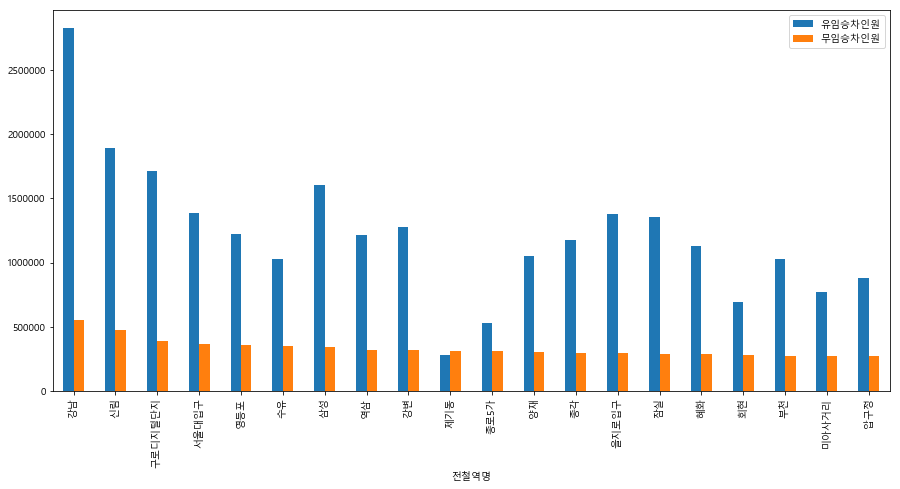

In [23]:
# plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
df_전철역_summary[['유임승차인원','무임승차인원']].plot(kind='bar',figsize=(15,7))

In [25]:
df_강남_시계열_summary=df[df['전철역명'].isin(['강남'])]
df_강남_시계열_summary=df_강남_시계열_summary[['유임승차인원','무임승차인원','X좌표(WGS)','Y좌표(WGS)']].groupby(df_강남_시계열_summary['사용월']).mean().sort_values(by=['사용월'], axis=0, ascending=True)

# df_강남_시계열_summary.set_index('사용월',inplace=True)
df_강남_시계열_summary

# pd.pivot_table(df_강남_시계열_summary, index = ['사용월','전철역명'], values = '유임승차인원', aggfunc = 'mean')

,유임승차인원,무임승차인원,X좌표(WGS),Y좌표(WGS)
사용월,,,,
201501,3266271,3353256,37.497175,127.027926
201502,2681119,2742084,37.497175,127.027926
201503,3048498,3112464,37.497175,127.027926
201504,2827674,2822580,37.497175,127.027926
201505,2745195,2811347,37.497175,127.027926
201506,2566181,2614786,37.497175,127.027926
201507,3129660,3196576,37.497175,127.027926
201508,2870951,2935195,37.497175,127.027926
201509,2559307,2621178,37.497175,127.027926


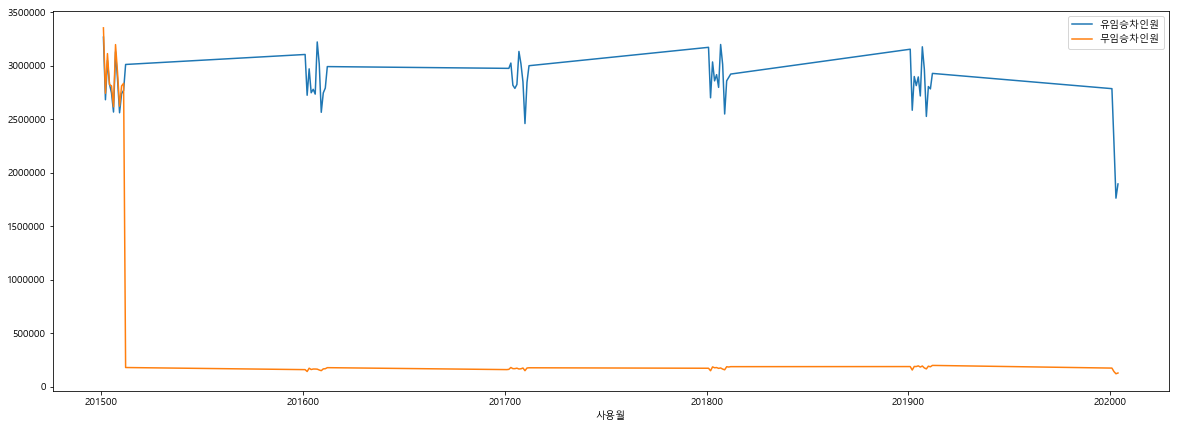

In [27]:
plt.rcParams['font.family'] = 'Malgun Gothic'
df_강남_시계열_summary[['유임승차인원','무임승차인원']].plot(kind='line',figsize=(20,7))

In [31]:
# anaconda prompt에서
# pip install folium
# pip install geopy

import folium # 지도 관련 시각화
from folium.plugins import MarkerCluster #지도 관련 시각화
import geopy.distance #거리 계산해주는 패키지 사용

In [57]:
#-*- coding:utf-8 -*-

map =folium.Map(location=[37.5502, 126.982], zoom_start=12)
# map =folium.Map(location=[37.5502, 126.982], zoom_start=12, tiles='cartodbpositron')

for n in df_전철역_summary.index:
  folium.CircleMarker([df_전철역_summary['X좌표(WGS)'][n], df_전철역_summary['Y좌표(WGS)'][n]],popup=n,tooltip=n, Encoding='utf-8',
                        radius = df_전철역_summary['승차인원'][n]/20000,
                        color='#fffggg', fill_color='#fffggg').add_to(map)
for n in df_전철역_summary.index:
  folium.CircleMarker([df_전철역_summary['X좌표(WGS)'][n], df_전철역_summary['Y좌표(WGS)'][n]],popup=n,tooltip=n, Encoding='utf-8',
                        radius = df_전철역_summary['무임승차인원'][n]/20000,
                        color='#fffggg', fill_color='red').add_to(map)


# marker_cluster = MarkerCluster().add_to(map)
# for n in df_전철역_summary.index:
#   folium.Marker( location = [df_전철역_summary['X좌표(WGS)'][n],df_전철역_summary['Y좌표(WGS)'][n]], popup= n, icon=folium.Icon(color='cadetblue',icon='ok')).add_to(marker_cluster)

map